<a href="https://colab.research.google.com/github/a123700/Leo/blob/master/Build_moving_average_with_the_Kalman_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pykalman
!pip install -q yfinance

     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 128 kB 67.6 MB/s 
     |████████████████████████████████| 4.0 MB 115.5 MB/s 
     |████████████████████████████████| 112 kB 68.3 MB/s 
     |████████████████████████████████| 110 kB 92.7 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from pykalman import KalmanFilter
import yfinance as yf

In [ ]:
data = yf.download("AAPL", start="2020-01-01", end="2022-01-01")
prices = data["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
kf = KalmanFilter(
    transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=0.01
)

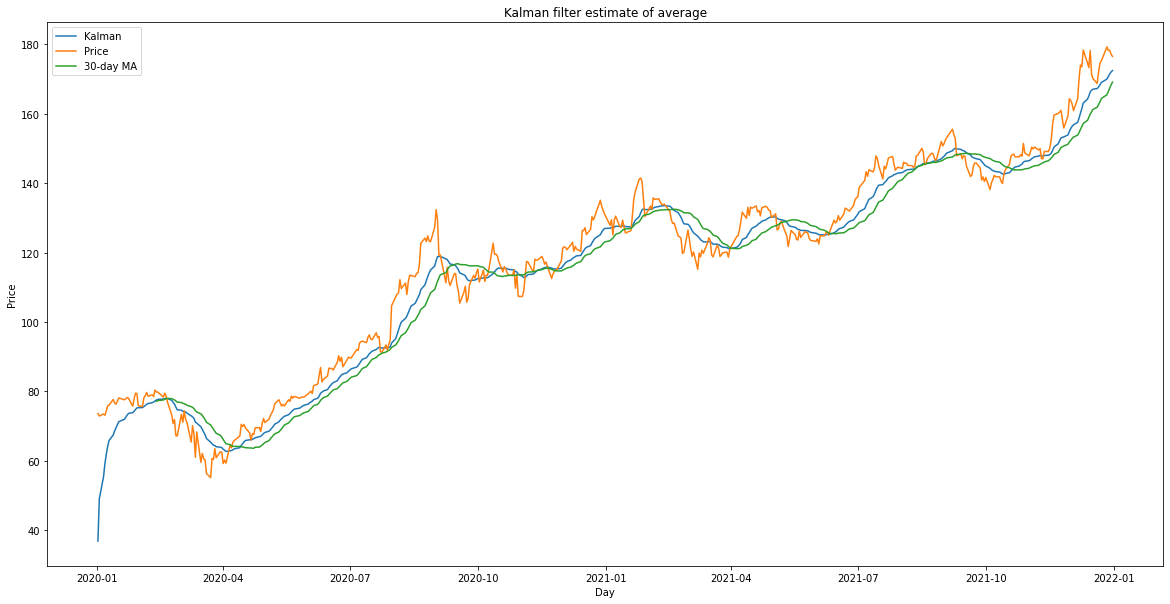

In [ ]:
state_means, _ = kf.filter(prices.values)
state_means = pd.Series(state_means.flatten(), index=prices.index)

mean30 = prices.rolling(window=30).mean()

plt.figure(figsize=(20, 10))
plt.plot(state_means)
plt.plot(prices)
plt.plot(mean30)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman', 'Price', '30-day MA'])
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

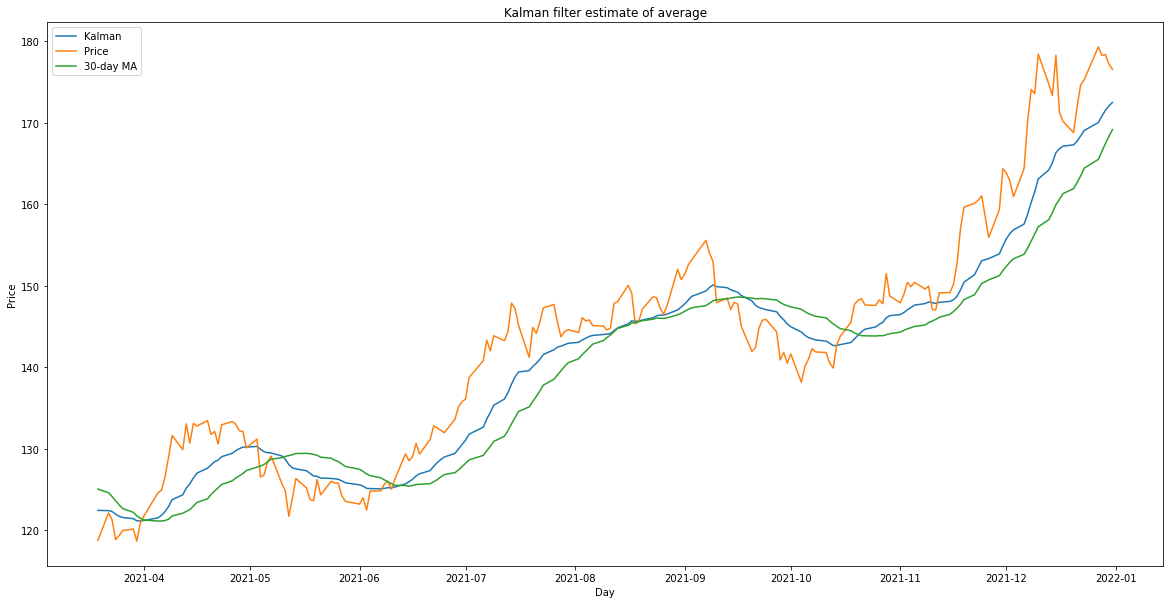

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(state_means[-200:])
plt.plot(prices[-200:])
plt.plot(mean30[-200:])
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman', 'Price', '30-day MA'])
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()